<a href="https://colab.research.google.com/github/abdullahiabubakarumar21-cloud/Group-6-Capstone-/blob/main/GROUP_6_FINAL_REAL_ESTATE_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library Importation


In [22]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



Dataset Unzipping and Extraction

In [2]:
# 1. Define the path to the zip file
zip_file_path = '/content/Bengaluru House price (1).zip'

# 2. Create a directory to store the extracted files
extraction_dir = 'extracted_data'
os.makedirs(extraction_dir, exist_ok=True)

# 3. Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Contents extracted to: {extraction_dir}/")

# 4. List the files in the 'extracted_data' directory
extracted_files = os.listdir(extraction_dir)
print("Files in extracted_data directory:", extracted_files)

Contents extracted to: extracted_data/
Files in extracted_data directory: ['Bengaluru_House_Data.csv']


EDA

In [3]:
csv_file_path = os.path.join(extraction_dir, extracted_files[0])
df = pd.read_csv(csv_file_path)

print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nShape of the DataFrame:")
print(df.shape)

print("\nColumn names of the DataFrame:")
print(df.columns)

print("\nData types of each column:")
print(df.dtypes)


First 5 rows of the DataFrame:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  

Shape of the DataFrame:
(13320, 9)

Column names of the DataFrame:
Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Dat

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
print("\n--- Missing Values Count ---\n")
print(df.isnull().sum())


--- Missing Values Count ---

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


Identifying Potential Inconsistencies

In [8]:
print("\n--- Categorical Column Exploration ---")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Top 10 most frequent values:\n{df[col].value_counts().head(10)}")


--- Categorical Column Exploration ---

Column: area_type
Number of unique values: 4
Top 10 most frequent values:
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

Column: availability
Number of unique values: 81
Top 10 most frequent values:
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
19-Dec             185
18-Jul             143
18-Mar             131
18-Jun              99
20-Dec              98
Name: count, dtype: int64

Column: location
Number of unique values: 1305
Top 10 most frequent values:
location
Whitefield               540
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
Thanisandra              234
Yelahanka                213
Uttarahalli              186
Hebbal                   177
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: cou

Data Preprocessing

In [9]:
print("Original columns:", df.columns.tolist())
df.drop('society', axis=1, inplace=True)
print("Columns after dropping 'society':", df.columns.tolist())

Original columns: ['area_type', 'availability', 'location', 'size', 'society', 'total_sqft', 'bath', 'balcony', 'price']
Columns after dropping 'society': ['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath', 'balcony', 'price']


Handling Missing Values

In [10]:
location_mode = df['location'].mode()[0]
df['location'].fillna(location_mode, inplace=True)
print(f"Missing values in 'location' after imputation: {df['location'].isnull().sum()}")

Missing values in 'location' after imputation: 0


/tmp/ipython-input-994246890.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna(location_mode, inplace=True)


In [11]:
location_mode = df['location'].mode()[0]
df['location'] = df['location'].fillna(location_mode)
print(f"Missing values in 'location' after imputation: {df['location'].isnull().sum()}")

bath_median = df['bath'].median()
df['bath'] = df['bath'].fillna(bath_median)
print(f"Missing values in 'bath' after imputation: {df['bath'].isnull().sum()}")

balcony_median = df['balcony'].median()
df['balcony'] = df['balcony'].fillna(balcony_median)
print(f"Missing values in 'balcony' after imputation: {df['balcony'].isnull().sum()}")

Missing values in 'location' after imputation: 0
Missing values in 'bath' after imputation: 0
Missing values in 'balcony' after imputation: 0


In [12]:
size_mode = df['size'].mode()[0]
df['size'] = df['size'].fillna(size_mode)
print(f"Missing values in 'size' after imputation: {df['size'].isnull().sum()}")

Missing values in 'size' after imputation: 0


Creating the BHK column to extract the integers only

In [13]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if pd.notnull(x) else x)
print("First 5 rows with new 'bhk' column:")
print(df[['size', 'bhk']].head())
print(f"Missing values in 'bhk' after creation: {df['bhk'].isnull().sum()}")
print(f"Data type of 'bhk' column: {df['bhk'].dtype}")

First 5 rows with new 'bhk' column:
        size  bhk
0      2 BHK    2
1  4 Bedroom    4
2      3 BHK    3
3      3 BHK    3
4      2 BHK    2
Missing values in 'bhk' after creation: 0
Data type of 'bhk' column: int64


In [14]:
def convert_sqft_to_float(x):
    try:
        # Handle single numeric values
        return float(x)
    except ValueError:
        # Handle range values
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        # Handle other non-numeric string values (e.g., '1000Sq. Meter')
        try:
            # Try to convert again after stripping non-numeric chars
            return float(''.join(filter(str.isdigit, x)))
        except ValueError:
            return None # Return None for NaN

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_float)

print("First 5 rows of 'total_sqft' after conversion:")
print(df['total_sqft'].head())
print(f"Data type of 'total_sqft' column after conversion: {df['total_sqft'].dtype}")

First 5 rows of 'total_sqft' after conversion:
0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64
Data type of 'total_sqft' column after conversion: float64


In [15]:
print("\n--- Missing Values Count After Preprocessing ---\n")
print(df.isnull().sum())


--- Missing Values Count After Preprocessing ---

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64


Feature Engineering



In [16]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']
print("First 5 rows with new 'price_per_sqft' column:")
print(df[['price', 'total_sqft', 'price_per_sqft']].head())

First 5 rows with new 'price_per_sqft' column:
    price  total_sqft  price_per_sqft
0   39.07      1056.0     3699.810606
1  120.00      2600.0     4615.384615
2   62.00      1440.0     4305.555556
3   95.00      1521.0     6245.890861
4   51.00      1200.0     4250.000000


In [17]:
print("\n--- Location Value Counts ---\n")
location_counts = df['location'].value_counts()
print(location_counts.head(20))
print(f"\nNumber of unique locations before grouping: {len(location_counts)}")


--- Location Value Counts ---

location
Whitefield                  541
Sarjapur  Road              399
Electronic City             302
Kanakpura Road              273
Thanisandra                 234
Yelahanka                   213
Uttarahalli                 186
Hebbal                      177
Marathahalli                175
Raja Rajeshwari Nagar       171
Hennur Road                 152
Bannerghatta Road           152
7th Phase JP Nagar          149
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                107
Chandapura                  100
Bellandur                    96
KR Puram                     91
Electronics City Phase 1     88
Name: count, dtype: int64

Number of unique locations before grouping: 1305


In [18]:
location_stats_less_than_10 = location_counts[location_counts <= 10]
print(f"\nLocations with less than 10 data points: {len(location_stats_less_than_10)}")

df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

print("\nFirst 5 rows of 'location' after grouping:")
print(df['location'].head())


Locations with less than 10 data points: 1064

First 5 rows of 'location' after grouping:
0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object


In [19]:
print(f"Number of unique locations after grouping: {df['location'].nunique()}")

Number of unique locations after grouping: 242


Model Training

In [20]:
# One-hot encode the 'location' column
df_encoded = pd.get_dummies(df, columns=['location'], drop_first=True)

# 1. Define the feature matrix X
X = df_encoded.drop(columns=['price', 'area_type', 'availability', 'size', 'price_per_sqft'])

# Ensure 'bhk', 'bath', 'balcony', 'total_sqft' are present in X and select numeric types
X = X.select_dtypes(include=['number', 'uint8', 'float64', 'int64'])

# 2. Define the target vector y
y = df_encoded['price']

# Handle potential NaN values in X that might arise from previous conversions if not already handled
X.dropna(inplace=True)
# Align y with X after dropping NaNs
y = y.loc[X.index]

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (10656, 4)
Shape of X_test: (2664, 4)
Shape of y_train: (10656,)
Shape of y_test: (2664,)


In [24]:

# Instantiating each of these models
linear_reg_model = LinearRegression()
lasso_model = Lasso(random_state=42)
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

print("Models instantiated.")

#Train each instantiated model using the training data (X_train, y_train)
print("\nTraining Linear Regression model...")
linear_reg_model.fit(X_train, y_train)
print("Linear Regression model trained.")

print("\nTraining Lasso model...")
lasso_model.fit(X_train, y_train)
print("Lasso model trained.")

print("\nTraining Decision Tree Regressor model...")
decision_tree_model.fit(X_train, y_train)
print("Decision Tree Regressor model trained.")

print("\nTraining Random Forest Regressor model...")
random_forest_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

Models instantiated.

Training Linear Regression model...
Linear Regression model trained.

Training Lasso model...
Lasso model trained.

Training Decision Tree Regressor model...
Decision Tree Regressor model trained.

Training Random Forest Regressor model...
Random Forest Regressor model trained.


In [25]:
models = {
    "Linear Regression": linear_reg_model,
    "Lasso": lasso_model,
    "Decision Tree Regressor": decision_tree_model,
    "Random Forest Regressor": random_forest_model
}

results = {}

print("\n--- Model Evaluation ---\n")

for name, model in models.items():
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {
        "R-squared": r2,
        "MAE": mae,
        "RMSE": rmse
    }

    print(f"Model: {name}")
    print(f"  R-squared: {r2:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print("----------------------------------------")

# Identify the best performing model based on R-squared
best_model_name = max(results, key=lambda model_name: results[model_name]["R-squared"])
print(f"\nBest performing model (based on R-squared): {best_model_name} with R-squared of {results[best_model_name]["R-squared"]:.4f}")


--- Model Evaluation ---

Model: Linear Regression
  R-squared: 0.4315
  MAE: 45.9950
  RMSE: 110.0201
----------------------------------------
Model: Lasso
  R-squared: 0.4325
  MAE: 45.7237
  RMSE: 109.9208
----------------------------------------
Model: Decision Tree Regressor
  R-squared: 0.2585
  MAE: 40.9719
  RMSE: 125.6429
----------------------------------------
Model: Random Forest Regressor
  R-squared: 0.5937
  MAE: 36.1006
  RMSE: 93.0086
----------------------------------------

Best performing model (based on R-squared): Random Forest Regressor with R-squared of 0.5937


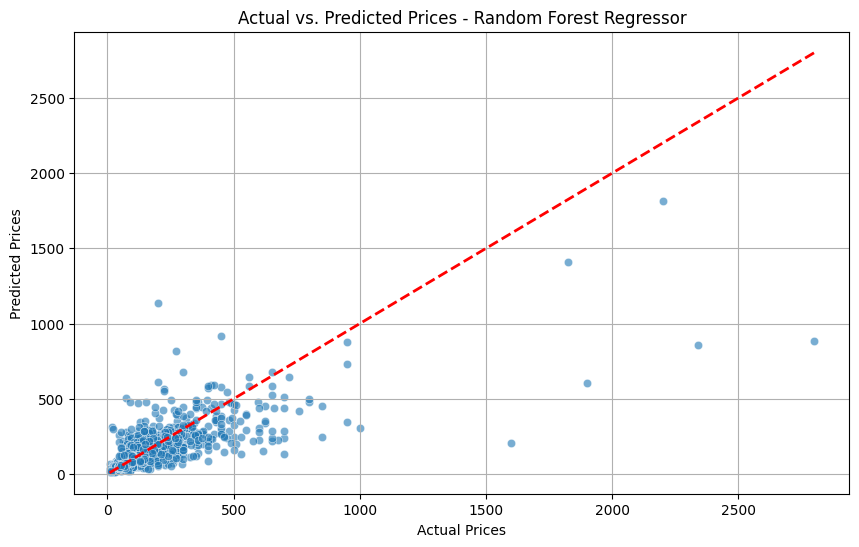

In [26]:
# Get predictions from the best performing model (Random Forest Regressor)
random_forest_model = models["Random Forest Regressor"]
y_pred_rf = random_forest_model.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices - Random Forest Regressor')
plt.grid(True)
plt.show()

Residual plot for Random Forest Regressor

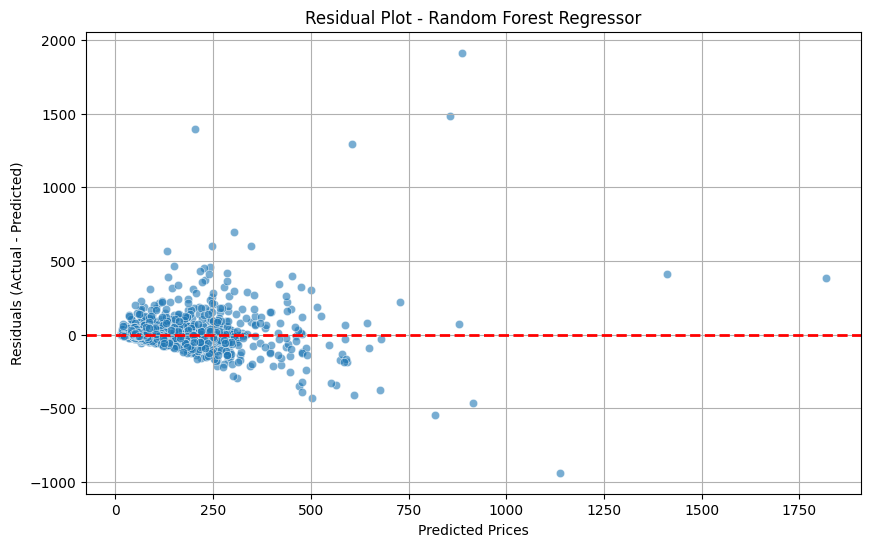

In [27]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot - Random Forest Regressor')
plt.grid(True)
plt.show()

## Summary:

### Q&A
The project aimed to predict real estate prices. The key questions addressed through the analysis were:
*   How to preprocess the raw house price data to handle missing values, inconsistent formats, and high-cardinality categorical features?
*   Which machine learning models are suitable for this regression task, and how do they perform?
*   Which model provides the best predictive performance based on standard regression metrics?

### Data Analysis Key Findings
*   The raw dataset `Bengaluru_House_Data.csv` contained 13320 rows and 9 columns.
*   Initial exploration revealed significant missing values in `society` (5502), `balcony` (609), `bath` (73), `size` (16), and `location` (1).
*   The `total_sqft` column was identified as an `object` type containing mixed data (single values, ranges, and non-numeric strings), requiring custom conversion.
*   The `size` column showed inconsistent formats (e.g., '2 BHK', '4 Bedroom') that needed standardization.
*   High cardinality was observed in `location` (1305 unique values) and `society` (2688 unique values), necessitating dimensionality reduction.
*   Data preprocessing steps included dropping the `society` column, imputing missing values in `location`, `bath`, `balcony`, and `size` using mode or median, creating a `bhk` (bedrooms, halls, kitchen) feature from `size`, and converting `total_sqft` to a numeric `float64` type by averaging ranges.
*   Feature engineering involved creating `price_per_sqft` as a new feature and reducing the cardinality of the `location` column by grouping locations with 10 or fewer data points into an 'other' category, reducing unique locations from 1305 to 242.
*   Four machine learning models (Linear Regression, Lasso, Decision Tree Regressor, and Random Forest Regressor) were trained and evaluated.
*   The **Random Forest Regressor** emerged as the best-performing model with an R-squared of approximately 0.5937, a Mean Absolute Error (MAE) of 36.1006, and a Root Mean Squared Error (RMSE) of 93.0086 on the test set.
*   Other models performed as follows: Linear Regression (R-squared: 0.4315), Lasso (R-squared: 0.4325), and Decision Tree Regressor (R-squared: 0.2585).

### Insights or Next Steps
*   The Random Forest Regressor provides a reasonably good baseline for real estate price prediction with an R-squared of ~0.59. Further performance gains could be explored through hyperparameter tuning of the Random Forest model or investigating more advanced ensemble methods.
*   Consider exploring outlier detection and treatment, especially for features like `bath` (maximum of 40 bathrooms observed), as this could further improve model robustness and accuracy.
